In [2]:
library(plotly)
library(ggplot2)
library(ggmap)
library(formattable)
library(osmar)
library(RColorBrewer)
library(RSQLite)
library(sqldf)
library(mongolite)
library(jsonlite)
library(rio)
library(bigmemory)
# library(ggforce)
library(dygraphs)
library(leaflet)
library(DT)
library(igraph)
# library(geojsonio)

In [4]:
# install.packages('')

###  &#x1F4D1; &nbsp; Links


###  &#x1F4D1; &nbsp; Maps

In [18]:
src <- osmsource_api()
bigbox <- center_bbox(38.6533, 55.7758, 3000, 3000)
bpavposad <- get_osm(bigbox, source = src)
str(bpavposad)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	27407 obs. of  9 variables:
  .. ..$ id       : num [1:27407] 7.65e+07 2.54e+09 2.54e+09 2.54e+09 2.54e+09 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:27407], format: "2013-03-22 17:51:04" "2013-11-21 21:54:26" ...
  .. ..$ version  : num [1:27407] 3 1 1 1 1 1 1 1 1 1 ...
  .. ..$ changeset: num [1:27407] 15457006 19045860 19045860 19045860 19046068 ...
  .. ..$ user     : Factor w/ 64 levels "347929","Владимир К",..: 39 27 27 27 27 27 27 27 27 27 ...
  .. ..$ uid      : Factor w/ 64 levels "109327","11132",..: 42 13 13 13 13 13 13 13 13 13 ...
  .. ..$ lat      : num [1:27407] 55.8 55.8 55.8 55.8 55.8 ...
  .. ..$ lon      : num [1:27407] 38.7 38.7 38.7 38.6 38.7 ...
  ..$ tags :'data.frame':	941 obs. of  3 variables:
  .. ..$ id: num [1:941] 2.54e+09 2.54e+09 2.54e+09 2.54e+09 1.34e+09 ...
  .. ..$ k : Factor w/ 99 levels "addr:city","addr:country",..: 20 32 20 32 20

In [19]:
users <- sort(unique(bpavposad$nodes$attrs$user))
print(head(users, 12))

 [1] 347929               Владимир К           Павел Гетманцев     
 [4] Челентано            a_isaeva             abel801             
 [7] ad47                 adekvatno            alex_konstantino    
[10] Alexander Leschinsky AMDmi3               Amigo               
64 Levels: 347929 Владимир К Павел Гетманцев Челентано a_isaeva ... Zloydevol


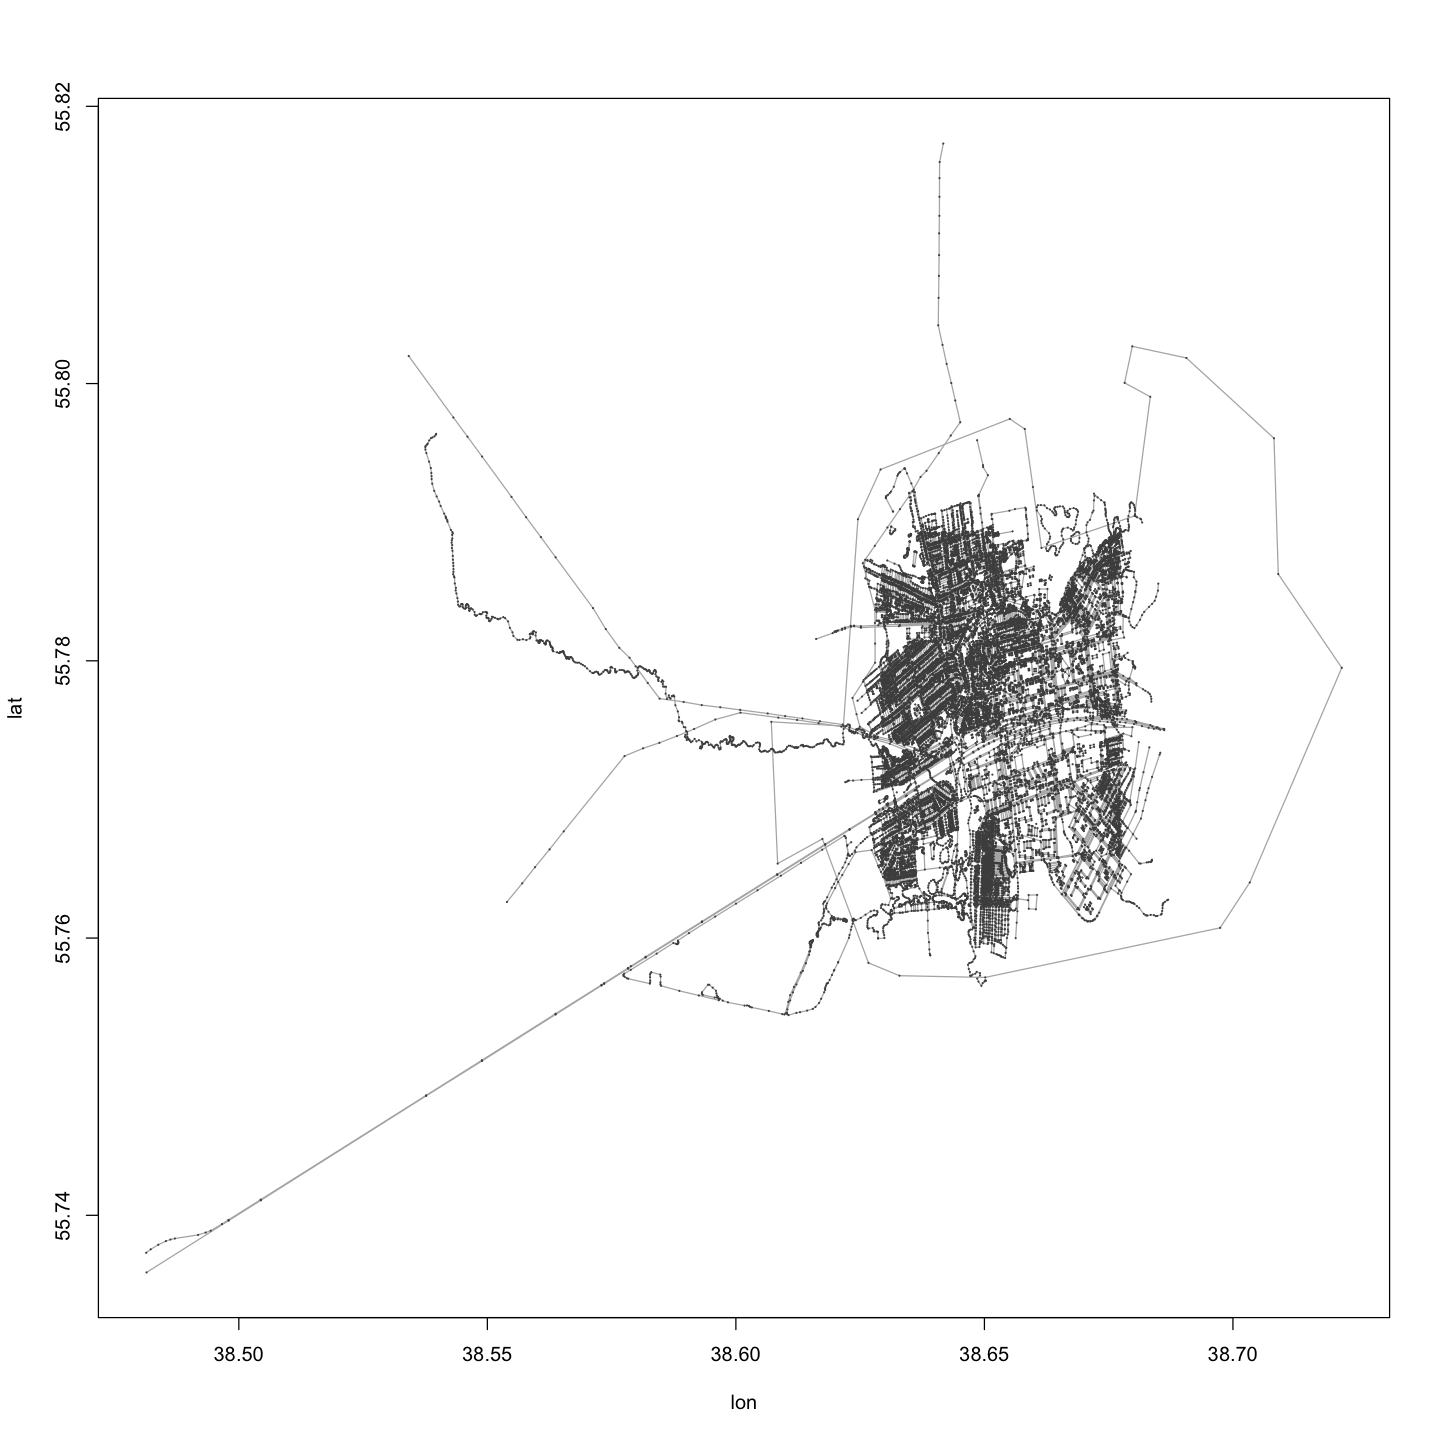

In [20]:
plot(bpavposad)

In [21]:
ts <- find(bpavposad, node(tags(v == "traffic_signals")))
ts_pp <- subset(bpavposad, node_ids = ts)
bs <- find(bpavposad, node(tags(v %agrep% "busstop")))
bs_pp <- subset(bpavposad, node_ids = bs)
hw <- find(bpavposad, way(tags(k == "highway")))
hw <- find_down(bpavposad, way(hw))
hw_pp <- subset(bpavposad, ids = hw)
tu <- find(bpavposad, way(tags(k == "tunnel")))
tu <- find_down(bpavposad, way(tu))
tu_pp <- subset(bpavposad, ids = tu)

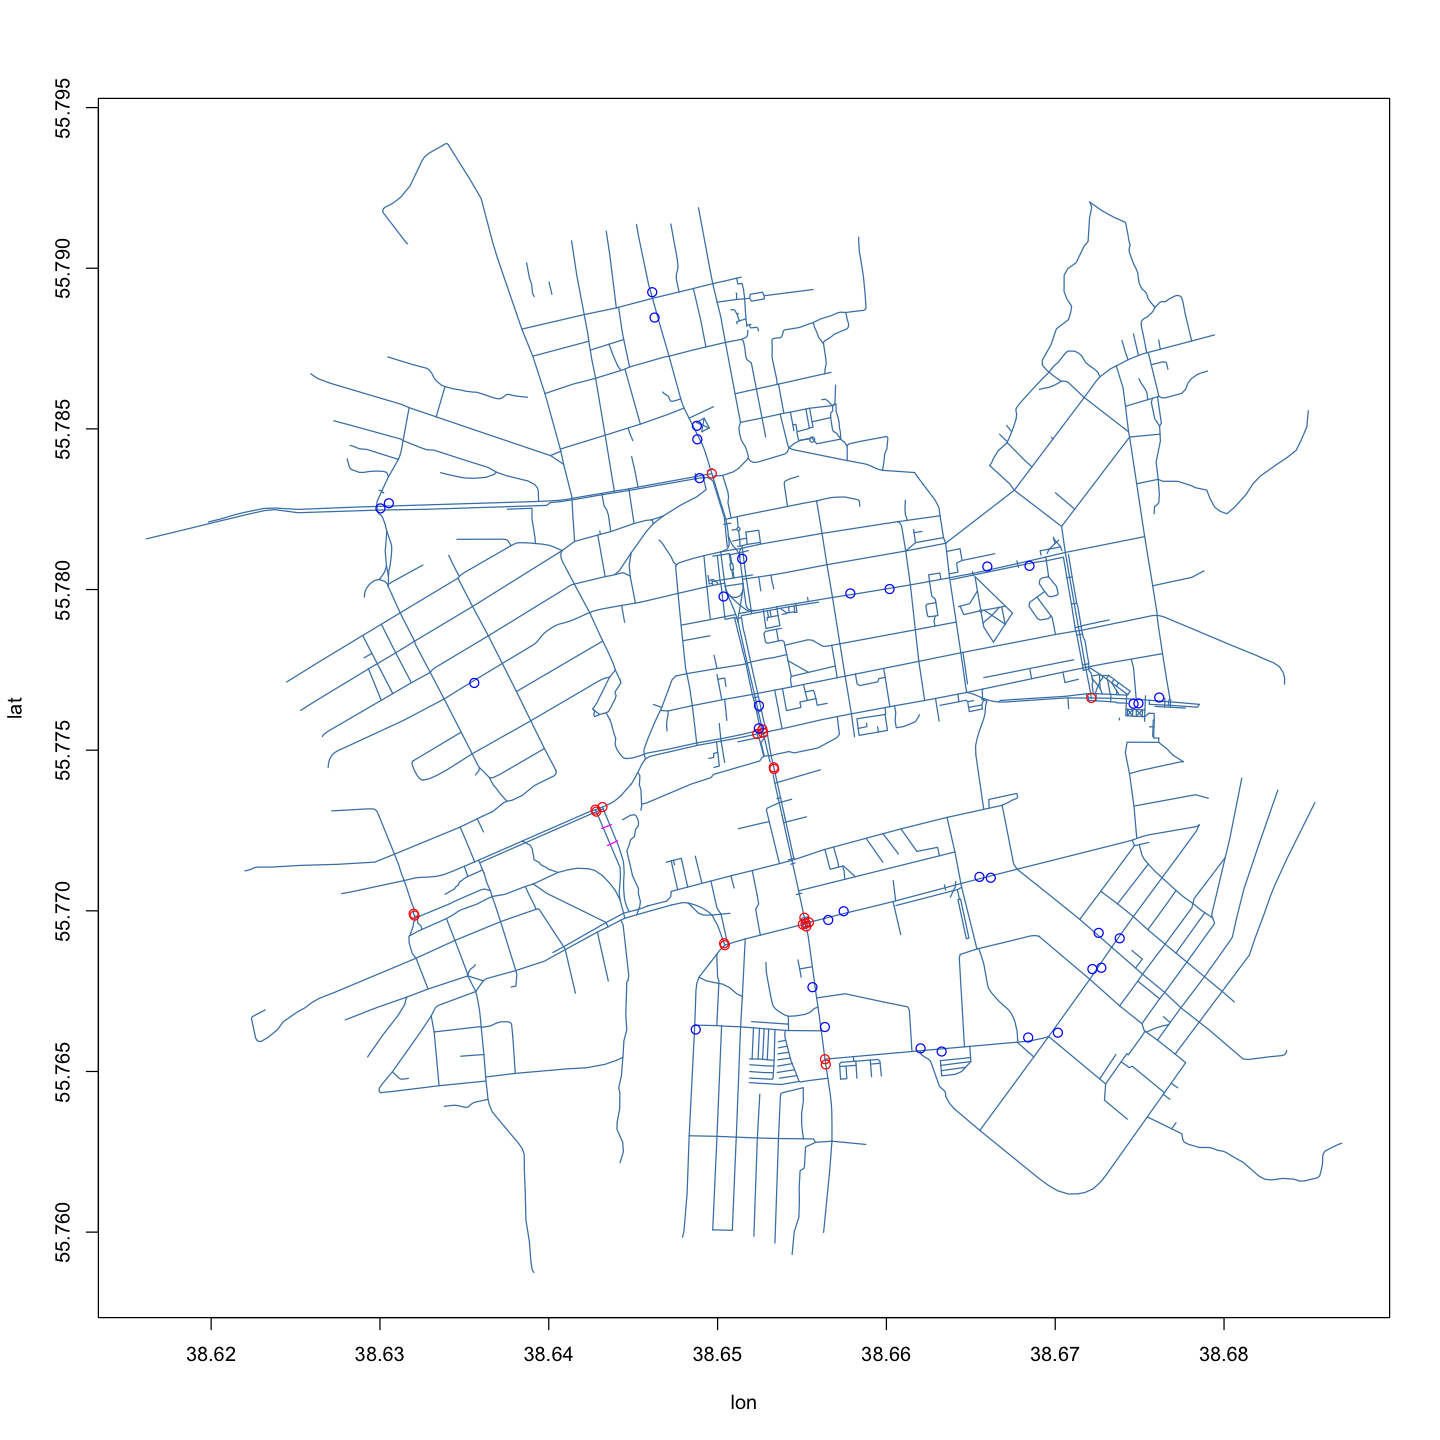

In [22]:
plot_ways(hw_pp, col = "steelblue")
plot_ways(tu_pp, add = TRUE, col = "magenta")
plot_nodes(ts_pp, add = TRUE, col = "red")
plot_nodes(bs_pp, add = TRUE, col = "blue")

In [23]:
bg <- find(bpavposad, way(tags(k == "building")))
bg <- find_down(bpavposad, way(bg))
bg_pp <- subset(bpavposad, ids = bg)
bg_poly <- as_sp(bg_pp, "polygons")

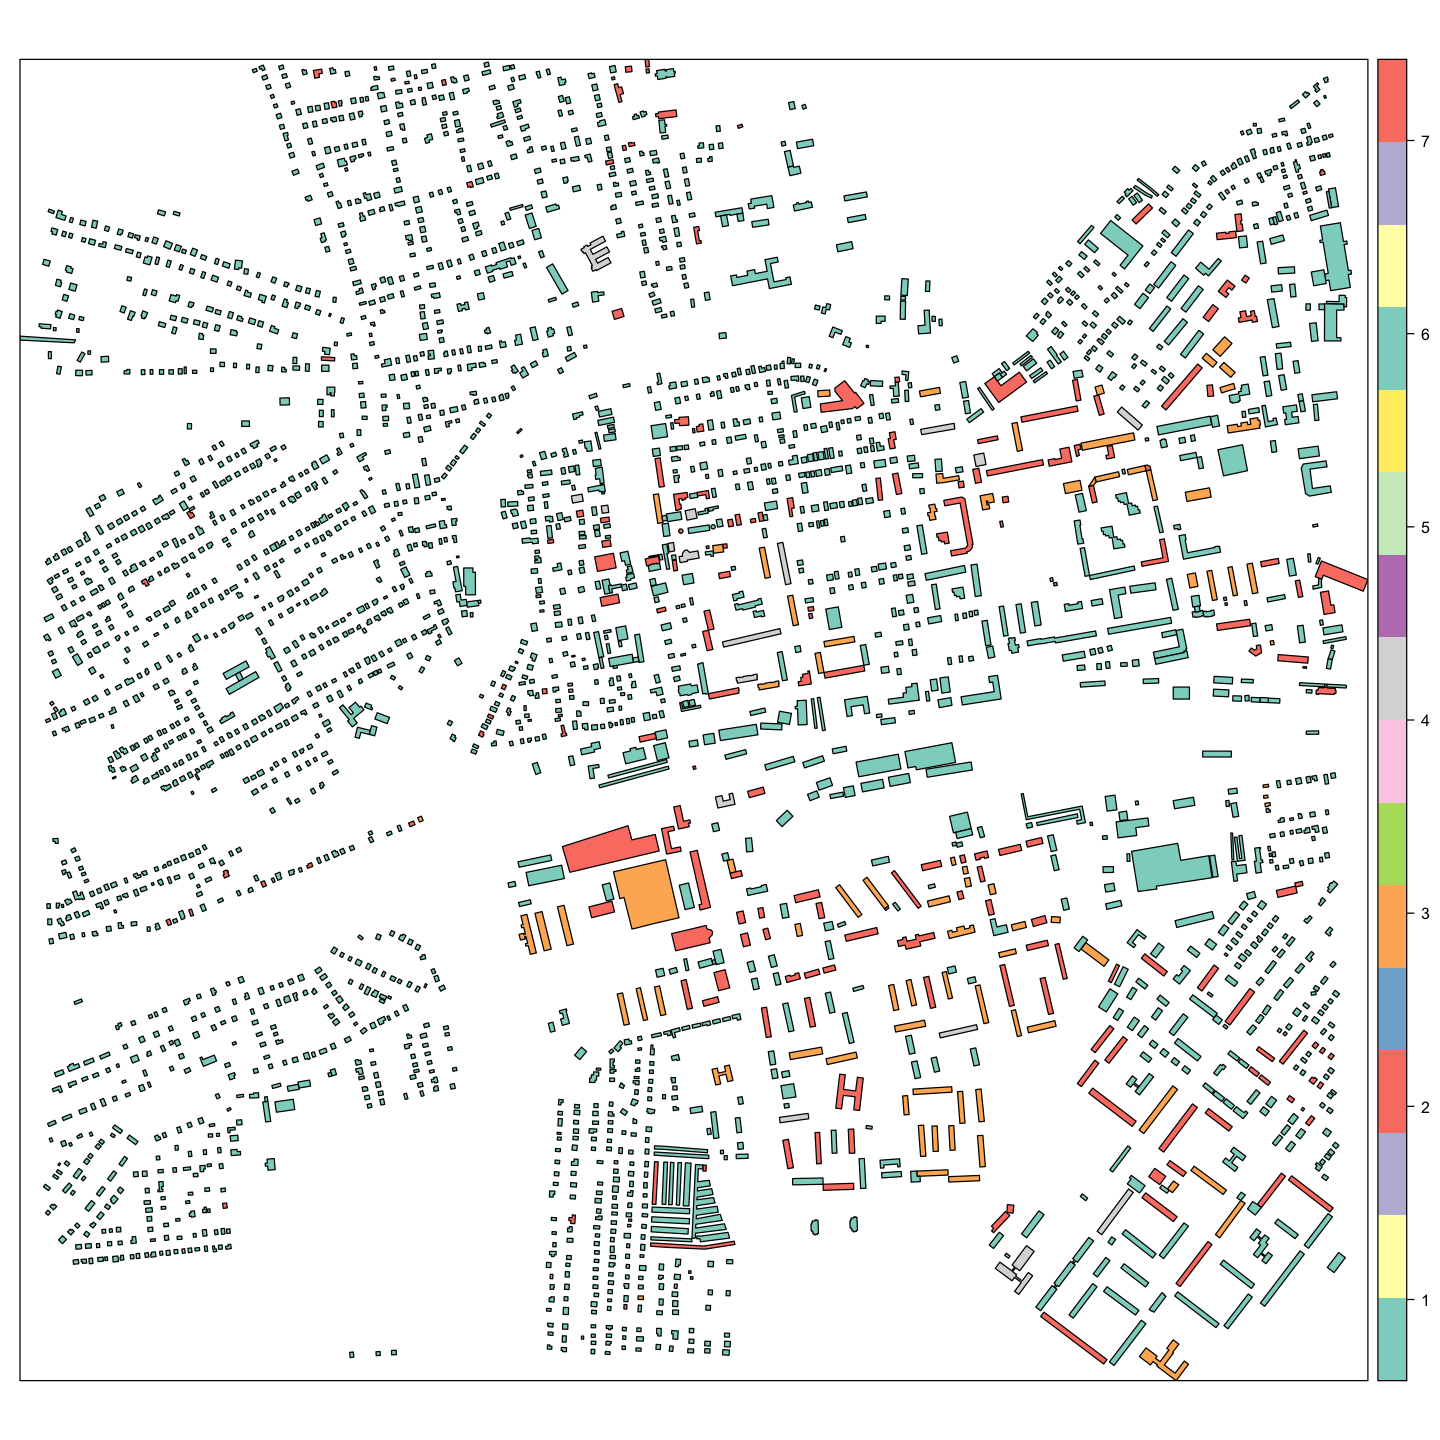

In [26]:
spplot(bg_poly, col.regions=brewer.pal(12, "Set3"), c("version"))

In [27]:
bs_points <- as_sp(bs_pp, "points")
hw_line <- as_sp(hw_pp, "lines")

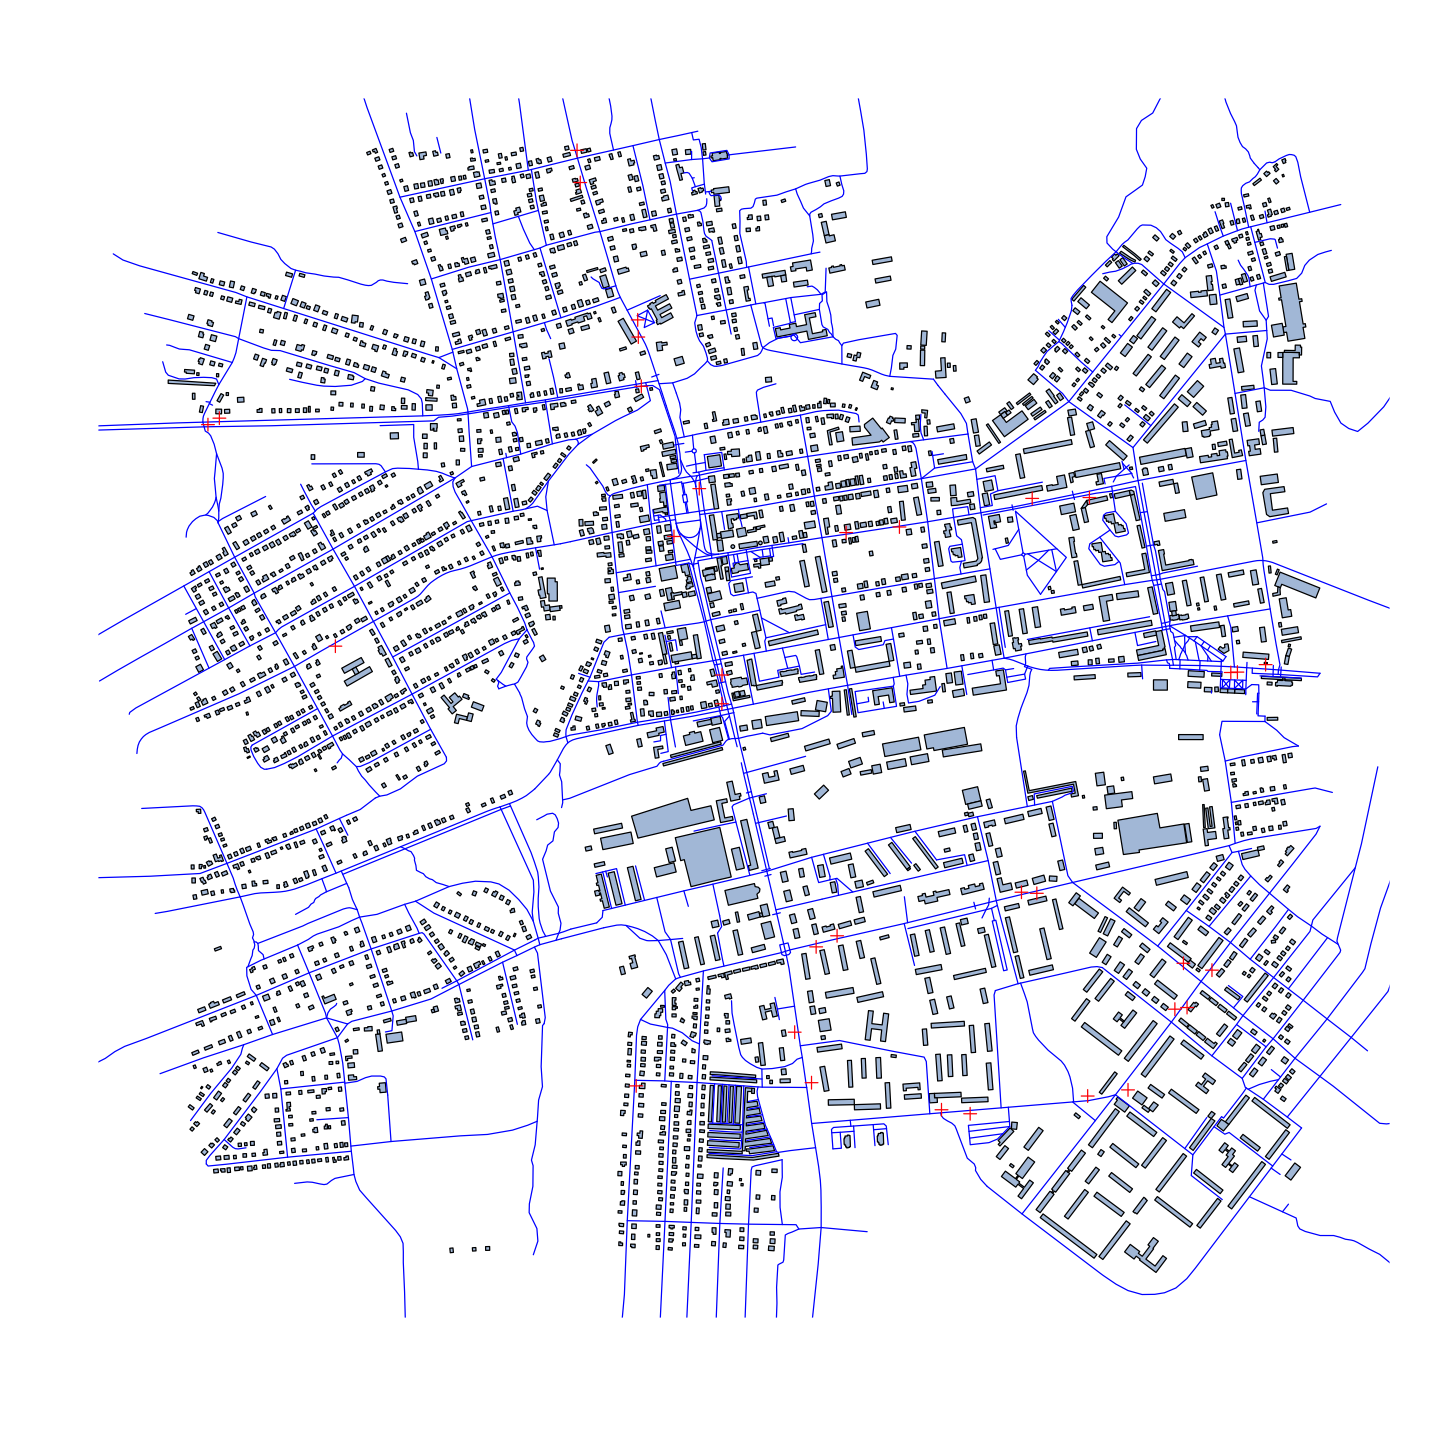

In [28]:
plot(bg_poly, col = "lightsteelblue")
plot(hw_line, add = TRUE, col = "blue")
plot(bs_points, add = TRUE, col = "red")